## CNN_컨볼루션 신경망 (합성곱 신경망)

In [ ]:
CNN_컨볼루션 신경망 (합성곱 신경망)
- 주소 시각적 이미지를 분석하는 데 사용
- 영상에서 객체, 얼굴 등의 패턴을 찾을 때 유용
- 오디오, 시계열, 신호 데이터 등 영상 이외의 데이터 분류에도 효과적
- 입력된 이미지에서 다시 한 번 특징을 추출하기 위해
- 마스크(필터, 윈도, 커널)을 도힙하는 기법

In [ ]:
컨롤루션(합성곱)
풀링(Pooling)
드롭아웃(drop out)

### 컨볼루션 (합성곱)

In [ ]:
컨롤루션(합성곱) 층 생성
- 입력된 이미지에
- 커널(마스크, 필터)을 적용하여
- 새로 계산된 가중치 값을 갖는 새로운 층 생성
- 컨볼루션을 만들면 입력 데이터로부터 좀 더 정교한 특징 추출 가능
- 여러 개의 커널을 적용할 경우 여러 개의 컨볼루션 생성


In [ ]:
그림

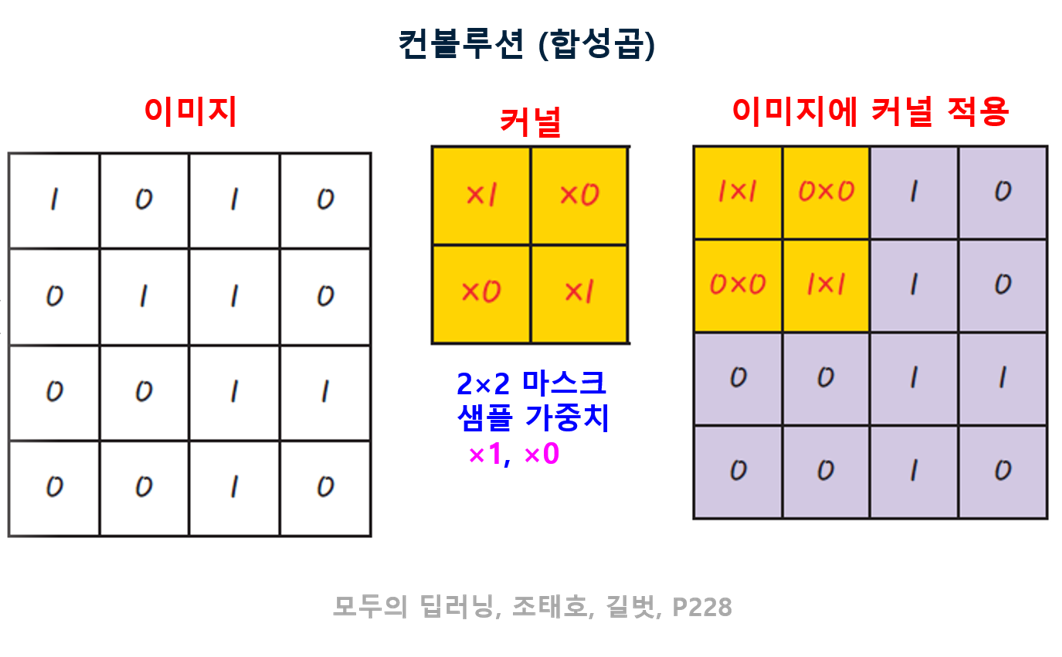

In [ ]:
마스크(커널)를 한 칸씩 옮겨 적용 --> 새롭게 만들어진 층을 컨볼루션(합성곱) 층

스트라이드(stride)
- 필터를 적용하는 위치의 간격
- 다음 그림 : 스트라이드를 1로 설정한 경우

In [ ]:
그림

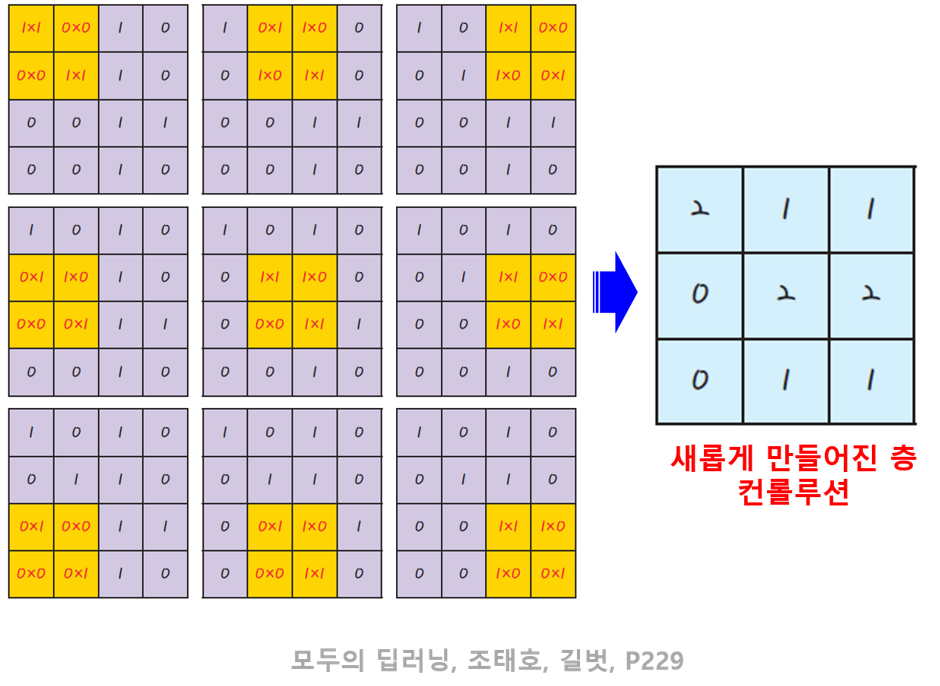

In [ ]:
이러한 커널을 여러 개 만들 경우 여러 개의 컨볼루션이 만들어짐

In [ ]:
# 그림

In [ ]:
케라스에서 컨볼루션 층을 추가하는 함수
- Conv2D()
- model.add(Conv2D(32, kernel_size=(3,3), input_shape(28,28,1), activation='relu'))

Conv2D() 인자
- 커널수
- 커널 크기 : kernel_size=(3,3) (3x3)
- 입력값 : input_shape(28,28,1) (행, 열, 색상 또는 흑백)(컬러:3, 흑백:1)
- 활성화 함수 

### 풀링(Pooling) 또는 서브 샘플링(Sub Sampling)

In [ ]:
풀링(Pooling)
- 컨볼루션 층을 통해 도출한 결과가 크고 복잡한 경우 축소하는 과정
- 맥스 풀링(Max Pooling) : 정해진 구역 안에서 최대값 추출
- 평균 풀링(Average Pooling) : 평균값 추출
- 풀링 과정을 거치면서 불필요한 정보가 추려짐

In [ ]:
그림

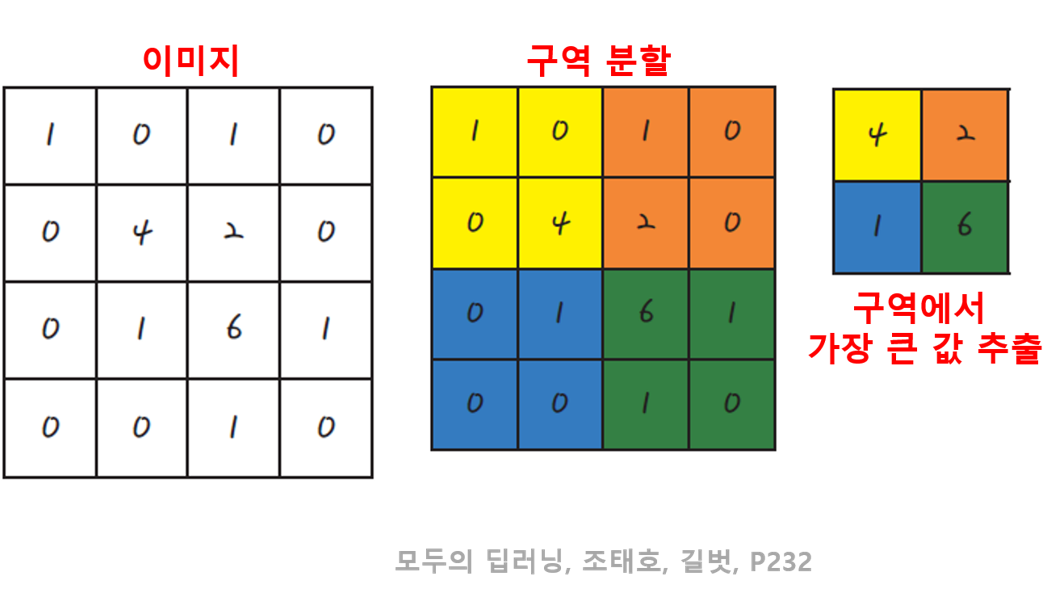

In [ ]:
맥스 풀링 
- MaxPooling2D() 사용
- model.add(MaxPooling2D(pool_size=2))
- pool_size : 풀링 창의 크기 설정. 
    - 수직, 수평 축소 비율을 지정
    - 2로 설정하면 전체 크기가 반으로 줄어듦

In [ ]:
드롭 아웃 (Drop Out)
- 과적합 문제를 해결하기 위한 방법
- 은닉층에 배치된 노드 중 일부를 임의로 꺼주는 것
- 간단하지만 효과가 큰 기법
- 랜덤하게 노드를 끔으로써 
- 학습 데이터에 지나치게 치우져서 학습되는 과적합을 방지할 수 있음
- 케라스의 Dropput() 사용
- model.add(Dropout(0.25)) : 25%의 노드를 끔

In [ ]:
# 그림

In [ ]:
플래튼 (Flatten())
- 2차원 배열을 1차원으로 바꿔줌 (옆으로 늘려주는 것)
- model.add(Flatten())
- 컨볼루션 층이나 맥스 풀링층은 주어진 이미지를 2차원 배열 형태로 다룸
- 이러한 과정을 지나 Dense()를 이용해서 기존 층에 연결될 때
- 주의할 점은 이를 1차원 배열로 바꿔주어야 활성화 함수가 있는 층에서 사용할 수 있음
- Flatten() 사용해서 2차원 배열을 1차원 배열로 변경

In [ ]:
#그림

### MNIST 이미지 인식 (분류)예제에 컨볼루션 신경망 적용

In [1]:
# 이미지 데이터 로드 및 전처리

# 이미지 데이터 셋 로드
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 차원 변환 및 정규화
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

ImportError: cannot import name 'sidecar_evaluator' from partially initialized module 'keras.distribute' (most likely due to a circular import) (C:\Users\ajin1\AppData\Roaming\Python\Python38\site-packages\keras\distribute\__init__.py)

In [ ]:
import tensorflow as tf

tf.random.set_seed(3)

In [ ]:
# (1) 모델 설정 : 컨볼루션 신경망 설정

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # 수직, 수평 축소 비율 (2: 반으로 줄어듦)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# (2) 모델 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
# 모델 성과 저장하도록 설정
# 모델의 최적화 단계에서 학습 자동 중단 : EarlyStopping
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단하도록 설정

from keras.callbacks import ModelCheckpoint, EarlyStopping
import os

# 모델 저장할 디렉터리 생상
# 현재 디렉터리에 model 디렉터리(폴더) 생성
# 존재하지 않으면 새로 생성
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 저장할 파일명 설정 : epoch-val_loss.hdf5
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True)
    
#  EarlyStopping 설정
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습 중단 
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 여기까지 실행하면 model 폴더만 생성되고
# 아직 파일 저장 안 됨

In [ ]:
# (3) 모델 실행(학습)
# 새로 생성된 콜백 사용해서 모델 훈련
history = model.fit(X_train, Y_train,
                   validation_data=(X_test, Y_test),
                   epochs=30, batch_size=200, verbose=0,
                   callbacks=[early_stopping_callback, checkpointer])

In [ ]:
# (4) 모델 평가
# 테스트 정확도 출력
print('\n 테스트 정확도 : %.4f' % (model.evaluate(X_test, Y_test)[1]))

In [ ]:
# val_loss와 loss 그래프로 표현

import matplotlib.pyplot as plt
import numpy

# 테스트 셋 val_loss(검증 손실 : 오차)
y_val_loss = history.history['val_loss']

# 학습 셋의 loss (오차)
y_loss = history.history['loss']

# 그래프 출력
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c='red', label='Test_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Train_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()